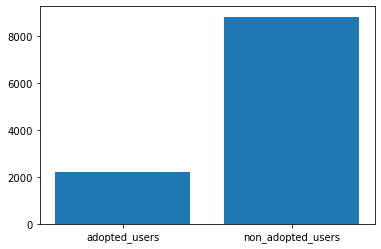

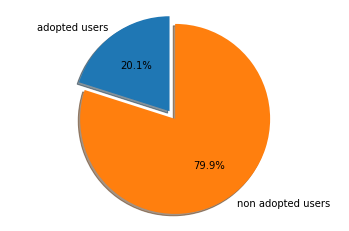

In [242]:
# Data visualization project 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

tue = pd.read_csv("takehome_user_engagement.csv")
pi = pd.read_csv("takehome_users.csv", encoding='latin-1')

sam = tue.drop_duplicates(subset='user_id', keep="last")
non_adopted_users = sam.shape[0]

tip = tue[["time_stamp","user_id"]]

df1 = tue.groupby('user_id').sum()

condition = df1["visited"]>=3
df2 = df1.where(condition) 

df2.dropna(inplace=True)

x = df2.filter(["user_id"])
y = pd.merge(tip,x,on='user_id')
z = y.groupby("user_id").agg(list)
 
z = z.reset_index()

m =[]
for rows in z.itertuples():
    my_list =[rows.user_id, rows.time_stamp]
    m.append(my_list)
    
adopted_users = 0
users = []
for i in range(len(m)):
    b = m[i][1]
    for j in range(2,len(b)):
        d1 = b[j]
        d2 = b[j-2]
        formats = '%Y-%m-%d %H:%M:%S'
        end = datetime.strptime(b[j], formats)
        start = datetime.strptime(b[j-2], formats)
        diff = end-start
        dif = diff.total_seconds()/604800
        if dif<7:
            users.append(m[i][0])
            adopted_users+=1
            break

x_axis = np.array(["adopted_users","non_adopted_users"])
y_axis = np.array([adopted_users,non_adopted_users])
plt.bar(x_axis,y_axis)
plt.show()

labels = 'adopted users','non adopted users'
sizes = [adopted_users,non_adopted_users]
explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

user = pd.DataFrame(users,columns=['object_id'])

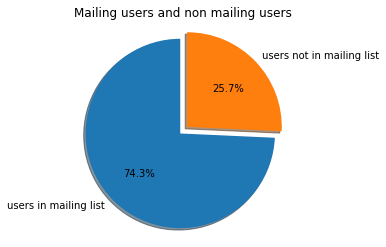

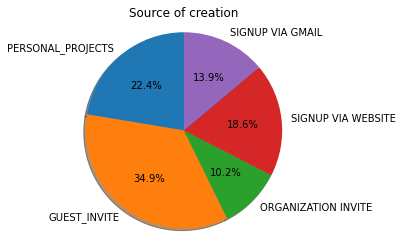

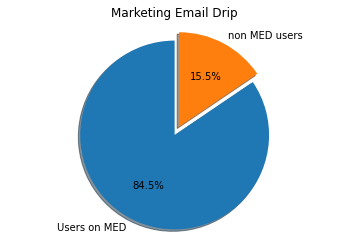

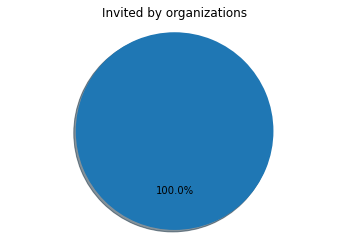

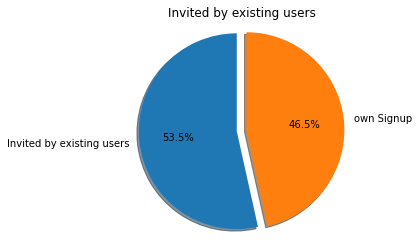

In [284]:
analyze = pd.merge(pi,user,on='object_id')
oio = pi.dropna(axis=0, subset=['org_id'])
uio = pi.dropna(axis=0, subset=['invited_by_user_id'])
or_i = oio.shape[0]
u_i = uio.shape[0]

om = analyze.groupby('opted_in_to_mailing_list').size()
cs = analyze.groupby('creation_source').size()
em = analyze.groupby('enabled_for_marketing_drip').size()
oi = analyze.groupby('org_id').size()
iu = analyze.groupby('invited_by_user_id').size()
 
op_ma = list(om)
cr_sr = list(cs)
en_mt = list(em)
or_id = list(oi)
in_us = list(iu)

labels = 'users in mailing list','users not in mailing list'
sizes = op_ma
explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Mailing users and non mailing users")
plt.show()


print()
print()

labels = 'PERSONAL_PROJECTS' ,'GUEST_INVITE','ORGANIZATION INVITE','SIGNUP VIA WEBSITE','SIGNUP VIA GMAIL'
sizes = cr_sr
explode = (0,0,0,0,0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Source of creation")
plt.show()

print()
print()

labels = 'Users on MED' ,'non MED users'
sizes = en_mt
explode = (0.1,0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Marketing Email Drip")
plt.show()

print()
print()

 
sizes = [or_i] 

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Invited by organizations")
plt.show()

print()
print()

labels = 'Invited by existing users','own Signup'
sizes = [u_i,12000-u_i]
explode = (0.1,0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Invited by existing users")
plt.show()

SUMMARY : 

Factors which may increase future user adoption are : 
        
        1. users in mailing list
        2. users subscribed for marketing email drop
        3. users invited by guest and personal project
        
Factors which may increase new users are :

        1. users invited by organization
       